📊 Desafio 61 — Gastos em Educação por Estado
📂 Dataset: Clique aqui para baixar o CSV

Este dataset apresenta dados de diversos estados brasileiros ao longo dos anos, incluindo PIB estadual, população e gastos em educação.

🔍 Tarefas:

Tratamento de Dados
- Existem valores ausentes em Gasto_Educacao. Identifique quais anos e estados estão afetados e proponha uma forma de preenchimento ou exclusão.

Comparação Regional
- Qual é a média de gasto em educação por região ao longo do tempo? Qual região mais investe proporcionalmente ao seu PIB?

Visualização
- Crie um gráfico de linha mostrando a evolução do gasto médio em educação por região de 2010 a 2020.

Machine Learning Simples
- Treine um modelo de regressão linear para prever o Gasto_Educacao com base no PIB_Estadual e População. Avalie o modelo com R² e mean_squared_error.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("dia_61_gastos_educacao.csv")
df.head()

,Estado,Região,Ano,PIB_Estadual,População,Gasto_Educacao
0,SP,Sudeste,2010,100.0,1000000,500.0
1,RJ,Sudeste,2010,110.0,1200000,620.0
2,MG,Sudeste,2010,120.0,1400000,700.0
3,RS,Sul,2010,130.0,1000000,820.0
4,PR,Sul,2010,140.0,1200000,500.0


In [8]:
#Existem valores ausentes em Gasto_Educacao. Identifique quais anos e estados estão afetados e proponha uma forma de preenchimento ou exclusão.
gasto_faltando = df[df["Gasto_Educacao"].isna()]
print(gasto_faltando[["Estado", "Ano"]])

df["Gasto_Educacao"] = df.groupby("Estado")["Gasto_Educacao"].transform("mean")
df.isna().sum()

   Estado   Ano
45     BA  2014
76     PE  2017


Estado            0
Região            0
Ano               0
PIB_Estadual      0
População         0
Gasto_Educacao    0
dtype: int64

In [15]:
#Qual é a média de gasto em educação por região ao longo do tempo? Qual região mais investe proporcionalmente ao seu PIB?
gasto_regional = df.groupby(["Região", "Ano"])["Gasto_Educacao"].mean().reset_index()

df["Investimento_Proporcional"] = df["Gasto_Educacao"] / df["PIB_Estadual"]
proporcional = df.groupby("Região")["Investimento_Proporcional"].mean().sort_values(ascending=False)

print(gasto_regional)
print(proporcional)

      Região   Ano  Gasto_Educacao
0   Nordeste  2010      787.833333
1   Nordeste  2011      787.833333
2   Nordeste  2012      787.833333
3   Nordeste  2013      787.833333
4   Nordeste  2014      787.833333
5   Nordeste  2015      787.833333
6   Nordeste  2016      787.833333
7   Nordeste  2017      787.833333
8   Nordeste  2018      787.833333
9   Nordeste  2019      787.833333
10  Nordeste  2020      787.833333
11     Norte  2010      635.000000
12     Norte  2011      635.000000
13     Norte  2012      635.000000
14     Norte  2013      635.000000
15     Norte  2014      635.000000
16     Norte  2015      635.000000
17     Norte  2016      635.000000
18     Norte  2017      635.000000
19     Norte  2018      635.000000
20     Norte  2019      635.000000
21     Norte  2020      635.000000
22   Sudeste  2010      681.666667
23   Sudeste  2011      681.666667
24   Sudeste  2012      681.666667
25   Sudeste  2013      681.666667
26   Sudeste  2014      681.666667
27   Sudeste  2015  

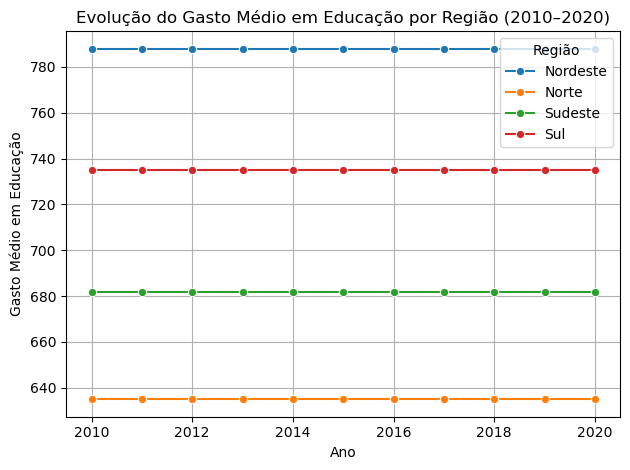

In [17]:
#Crie um gráfico de linha mostrando a evolução do gasto médio em educação por região de 2010 a 2020.
sns.lineplot(data=gasto_regional, x="Ano", y="Gasto_Educacao", hue="Região", marker="o")
plt.title("Evolução do Gasto Médio em Educação por Região (2010–2020)")
plt.xlabel("Ano")
plt.ylabel("Gasto Médio em Educação")
plt.grid()
plt.legend(title="Região")
plt.tight_layout()
plt.show()

In [18]:
#Treine um modelo de regressão linear para prever o Gasto_Educacao com base no PIB_Estadual e População. Avalie o modelo com R² e mean_squared_error.
X = df[["PIB_Estadual", "População"]]
y = df["Gasto_Educacao"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(r2)
print(mse)

-0.9842437891638962
15083.97222983098
